# Exercise 1: Performing decoupled MD simulations in parallel

In this exercise, the goal is to run 4 indepedent standard NPT MD simulations of the NaCl system in parallel, each for 500 ps. This can be achieved by using the `-multidir` flag in the GROMACS `mdrun` command, which runs multiple simulations simultaneously in different folders. This exercise should be performed in an interactive session on Bridges-2, with 32 cores requested. 

To get started, execute the commands below to set up the case.

In [1]:
%%bash
bash /ocean/projects/see220002p/shared/icomse-setup.sh  # load in necessary modules

In [2]:
%%bash

# Delete folders sim_*, if there is any. This is not necessary but convenient for rerunning the notebook. 
if ls -d sim_* >/dev/null 2>&1; then
  # If there are, delete them without prompting for confirmation
  rm -rf sim_*
fi

n=4  # number of simulations
for i in $(seq 1 $n)
do
    mkdir sim_${i} && cd sim_${i}
    cp ../../Inputs/NaCl/* .    # copy over the input gro, top and mdp files
    mpirun -np 1 gmx_mpi grompp -f MD-NPT.mdp -c NaCl.gro -p NaCl.top -o NaCl_md.tpr -maxwarn 1  # Generate the tpr
    cd ../
done

               :-) GROMACS - gmx grompp, 2020.6-plumed-2.8.0 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...


Excluding 1 bonded neighbours molecule type 'NA'
Excluding 1 bonded neighbours molecule type 'CL'
Setting gen_seed to -210895917
Velocities were taken from a Maxwell distribution at 300 K


Analysing residue names:
There are:   107      Water residues
There are:     2        Ion residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K


Number of degrees of freedom in T-Coupling group System is 645.00


Calculated rlist for 1x1 atom pair-list as 0.638 nm, buffer size 0.038 nm
Set rlist, assuming 4x4 atom pair-list, to 0.607 nm, buffer size 0.007 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.106 0.106 0.106


Estimate for the relative computational load of the PME mesh part: 0.42

There was 1 warning


This run will generate roughly 4 Mb of data



GROMACS reminds you: "The road to openness is paved with git commits" (Vedran Miletic)

               :-) GROMACS - gmx grompp, 2020.6-plumed-2.8.0 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg 

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...


Excluding 1 bonded neighbours molecule type 'NA'
Excluding 1 bonded neighbours molecule type 'CL'
Setting gen_seed to -859049985
Velocities were taken from a Maxwell distribution at 300 K


Analysing residue names:
There are:   107      Water residues
There are:     2        Ion residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.638 nm, buffer size 0.038 nm
Set rlist, assuming 4x4 atom pair-list, to 0.607 nm, buffer size 0.007 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.106 0.106 0.106
This run will generate roughly 4 Mb of data


Number of degrees of freedom in T-Coupling group System is 645.00
Estimate for the relative computational load of the PME mesh part: 0.42

There was 1 warning

GROMACS reminds you: "The road to openness is paved with git commits" (Vedran Miletic)

               :-) GROMACS - gmx grompp, 2020.6-plumed-2.8.0 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pron

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...


Setting gen_seed to -1612191253
Velocities were taken from a Maxwell distribution at 300 K


Analysing residue names:
There are:   107      Water residues
There are:     2        Ion residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.638 nm, buffer size 0.038 nm
Set rlist, assuming 4x4 atom pair-list, to 0.607 nm, buffer size 0.007 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.106 0.106 0.106
This run will generate roughly 4 Mb of data


Number of degrees of freedom in T-Coupling group System is 645.00
Estimate for the relative computational load of the PME mesh part: 0.42

There was 1 warning

GROMACS reminds you: "Nobody ever complained a seminar was too easy to understand." (Ken Dill)

               :-) GROMACS - gmx grompp, 2020.6-plumed-2.8.0 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    San

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...


Excluding 1 bonded neighbours molecule type 'NA'
Excluding 1 bonded neighbours molecule type 'CL'
Setting gen_seed to -1074270291
Velocities were taken from a Maxwell distribution at 300 K


Analysing residue names:
There are:   107      Water residues
There are:     2        Ion residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.638 nm, buffer size 0.038 nm
Set rlist, assuming 4x4 atom pair-list, to 0.607 nm, buffer size 0.007 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.106 0.106 0.106
This run will generate roughly 4 Mb of data


Number of degrees of freedom in T-Coupling group System is 645.00
Estimate for the relative computational load of the PME mesh part: 0.42

There was 1 warning

GROMACS reminds you: "Nobody ever complained a seminar was too easy to understand." (Ken Dill)



For each simulation, the commands above did the following:
- Create a folder with the file name in the form of `sim_*`.
- Copy the input files, including `NaCl.gro`, `NaCl.top`, and `NPT-MD.mdp`, to the folder.
- Run the GROMACS `grompp` command in the folder to generate the input `tpr` file.

After setting up the simulation inputs, we can run the GROMACS `mdrun` command. Note that the `mdrun` command should be executed one level above the `sim_*` directories (which is the working directory for each cell in this notebook).

In [3]:
%%time
%%bash
mpirun -np 8 gmx_mpi mdrun -s NaCl_md.tpr -deffnm output -multidir sim_1 sim_2 sim_3 sim_4 -ntomp 2

                :-) GROMACS - gmx mdrun, 2020.6-plumed-2.8.0 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:

CPU times: user 36.6 ms, sys: 14.5 ms, total: 51.1 ms
Wall time: 43 s


In the command above, `-np` specifies the number of MPI processes to run the 4 simulations, and `-ntomp` specifies the number of OpenMP threads per MPI process. Therefore, the value of `-np` should always be a multiple of the number of simulations, which is 4 in our case.

In this example, we ran the simulations with 8 MPI processes, each with 2 OpenMP threads per MPI process. This means: 
- Each of the 4 simulation was performed with 2 MPI processes, and the workload (e.g. the calculation of interactions) of running a simulation was further divided by 2 threads. 
- A total of 16 CPU cores were used to run the 4 simulations.
- That is 16 CPU cores were idle during the simulation, so we could have only requested 16 cores when launching the interactive session by using `--ntasks-per-node=16`. (Here we requested 32 cores just for the scaling test in the next section.) 

With this setup, it took about 45 seconds to finish all 4 simulations. As can be checked, now we have simulation outputs in each `sim_*` folder.

## Now, it's your turn! 👨‍💻

In the example above, we used 8 MPI processes (denoted as `np`), with 2 OpenMP threads per MPI process (denoted as `ntomp`), to run 4 simulations in parrallel. To determine a more efficient/cost-effective way to allocate comptuational resources for running MD simulations, it is common to perform a scaling test. This involves timing several short simulations with varying values of `np` or `ntomp`. By plotting the performance, such as ns/day (as demonstrated in the bottom of the log file), against `np` or `ntomp`, we can determine the cutoff point where the performance becomes sublinear.

As an exercise, try running 4 simulations of NaCl in parallel using different values of `ntomp`, specifically 1, 2, 4, and 8, while keeping `np` fixed at 4. Then, plot the performance as a function of the **the number of cores** and answer the following question: **What is the optimal number of OpenMP threads per MPI process required to run 4 standard MD simulations for the NaCl system with 4 MPI processes?**

Note that
- We could have requested 128 cores to test a wider range of the number of cores. Here we requested only 32 cores considering available computing resources for the workshop.
- The optimal number of `np`/`ntomp` for running MD simulations may vary depending on the system being studied and the simulation method used. Therefore, it is generally good practice to conduct a scaling test when kicking off a new proejct.

To extract the performance of a simulation from its log file, you may find the following function useful.

In [4]:
def get_performance(log):
    with open(log, 'r') as f:
        lines = f.readlines()
    for l in lines:
        if 'Performance' in l:
            return float(l.split()[1])

    print('Simulation not finished.')

## Solution

In [5]:
%%time
%%bash
ntomp=(1 2 4 8)  # 8 is the maximum since we have 128 cores and we fix np at 4

for i in "${ntomp[@]}"
do
    mpirun -np 4 gmx_mpi mdrun -s NaCl_md -deffnm output_$i -multidir sim_1 sim_2 sim_3 sim_4 -ntomp $i
done

                :-) GROMACS - gmx mdrun, 2020.6-plumed-2.8.0 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:

Reading file NaCl_md.tpr, VERSION 2020.6-plumed-2.8.0 (single precision)
Reading file NaCl_md.tpr, VERSION 2020.6-plumed-2.8.0 (single precision)
Changing nstlist from 10 to 25, rlist from 0.607 to 0.67

Changing nstlist from 10 to 25, rlist from 0.607 to 0.67

Changing nstlist from 10 to 25, rlist from 0.607 to 0.67

Changing nstlist from 10 to 25, rlist from 0.607 to 0.67


This is simulation 0 out of 4 running as a composite GROMACS
multi-simulation job. Setup for this simulation:

Using 1 MPI process

This is simulation 2 out of 4 running as a composite GROMACS
multi-simulation job. Setup for this simulation:

Using 1 MPI process

This is simulation 3 out of 4 running as a composite GROMACS
multi-simulation job. Setup for this simulation:

Using 1 MPI process

This is simulation 1 out of 4 running as a composite GROMACS
multi-simulation job. Setup for this simulation:

Using 1 MPI process

Non-default thread affinity set, disabling internal thread affinity

Non-default thread affin

of the License, or (at your option) any later version.

GROMACS:      gmx mdrun, version 2020.6-plumed-2.8.0
Executable:   /opt/conda/bin/gmx_mpi
Data prefix:  /opt/conda
Working dir:  /ocean/projects/cts160011p/wehs7661/3rd_workshop_advanced_sampling/Wednesday/Exercise_1
Command line:
  gmx_mpi mdrun -s NaCl_md -deffnm output_8 -multidir sim_1 sim_2 sim_3 sim_4 -ntomp 8

The current CPU can measure timings more accurately than the code in
gmx mdrun was configured to use. This might affect your simulation
speed as accurate timings are needed for load-balancing.
Please consider rebuilding gmx mdrun with the GMX_USE_RDTSCP=ON CMake option.
The current CPU can measure timings more accurately than the code in
gmx mdrun was configured to use. This might affect your simulation
speed as accurate timings are needed for load-balancing.
Please consider rebuilding gmx mdrun with the GMX_USE_RDTSCP=ON CMake option.
Compiled SIMD: SSE2, but for this host/run AVX2_256 might be better (see log).
The 

CPU times: user 125 ms, sys: 23.4 ms, total: 149 ms
Wall time: 2min 43s


As shown above, we tried running the simulations using 1, 2, 4, and 8 OpenMP threads per MPI process. Ideally, is should take about 3 minutes to complete the execution of the cell above. From the bottom of each log file, we can get the performance in ns/day for each case, which we can plot below. (Note that the result from different runs should be different but similar.) 

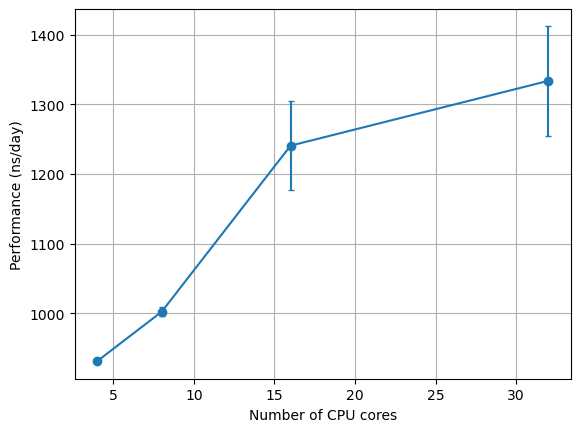

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_mpi = 4
ntomp = np.array([1, 2, 4, 8])
p_avg, p_std = [], []
for i in ntomp:
    p_list = []
    for j in range(1, 5):  # from sim_1 to sim_4
        p_list.append(get_performance(f'sim_{j}/output_{i}.log'))
    p_avg.append(np.mean(p_list))
    p_std.append(np.std(p_list))

plt.figure()
plt.errorbar(ntomp * n_mpi, p_avg, yerr=p_std, marker='o', capsize=2)
plt.xlabel('Number of CPU cores')
plt.ylabel('Performance (ns/day)')
plt.grid()

As shown above, the performance of the simulations increases with the value of `ntomp`/the number of cores. The scaling was approximately linearly up to the point where 16 cores were utilized. In the case of using 32 cores, the performance displayed a slightly sublinear trend. Thus, given the same simulation length, using 16 cores will take long than using 32 cores but is more cost-effective, meaning that it requires fewer computational resources in total to finish the simulation. Therefore, using 16 cores is the optimal choice among the 4 test cases. (Note that the results may slightly vary between different runs, so you might see a linear trend up to 32 cores. However, if more CPU cores are used (which we are not doing here), the trend should eventually becomes sublinear and a cutoff can be determined.)